In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)


In [66]:
import os
import math
pickle_path = os.path.join('..', 'data', 'features_by_date')
features_by_date = pd.read_pickle(pickle_path)
df=pd.DataFrame(data=features_by_date['filled_num_people_11_30'].values, columns=[['num_people_11_30']])
df_dates=pd.DataFrame(data=features_by_date[['date','weekday']].values, columns=[['date','weekday']])

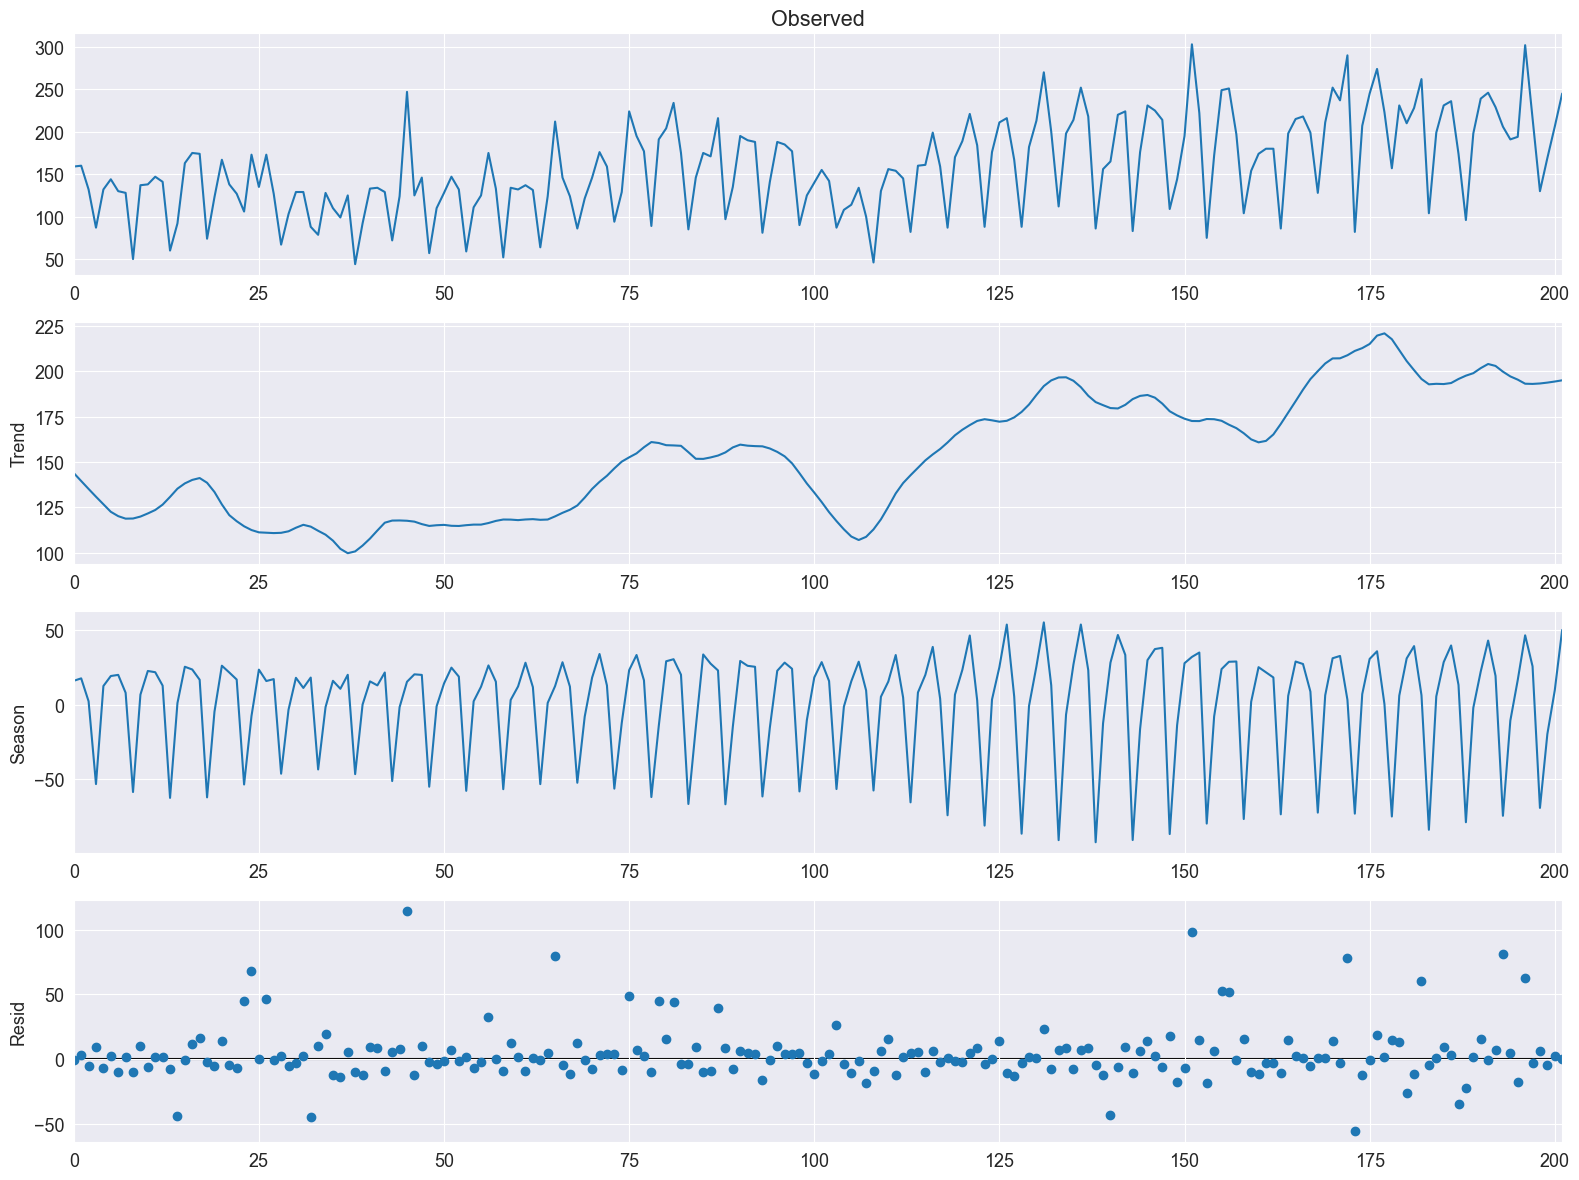

In [67]:
stl = STL(df,period=5, seasonal=7, robust=True)
res = stl.fit()
fig = res.plot()

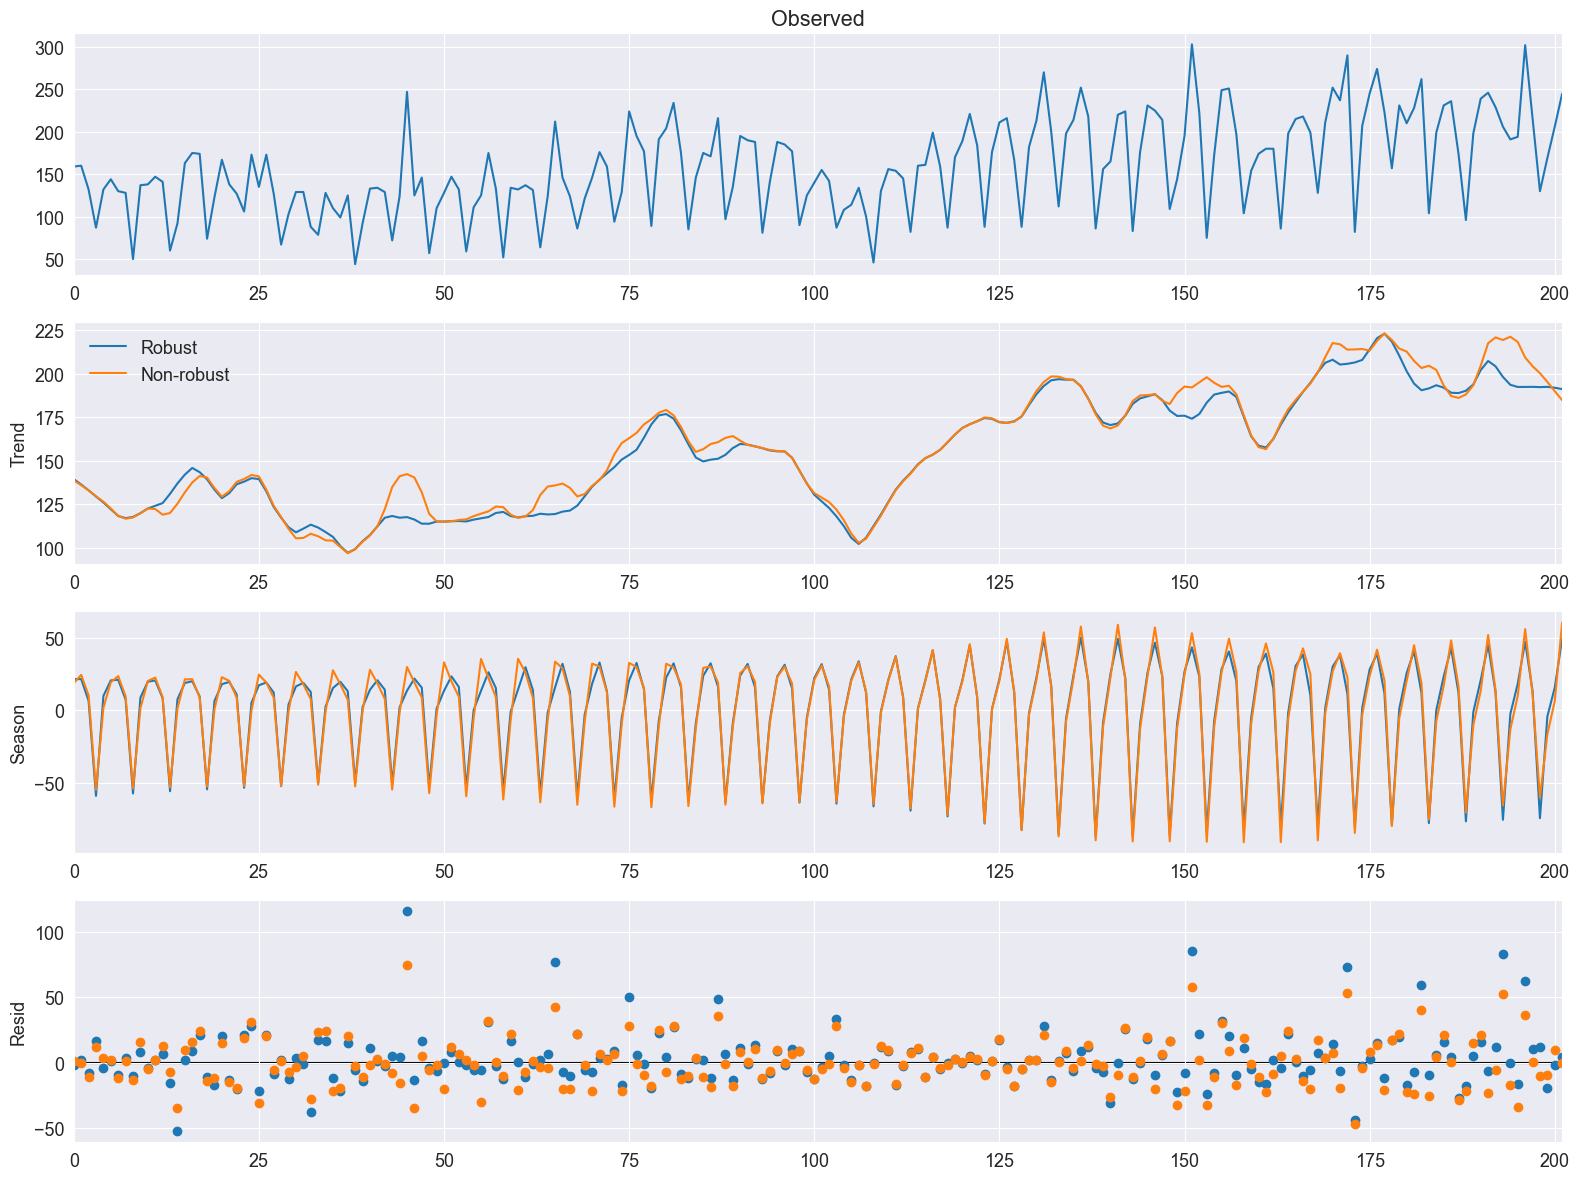

In [68]:
def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)


stl = STL(df, period=5, seasonal=13, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df, period=5, seasonal=13, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

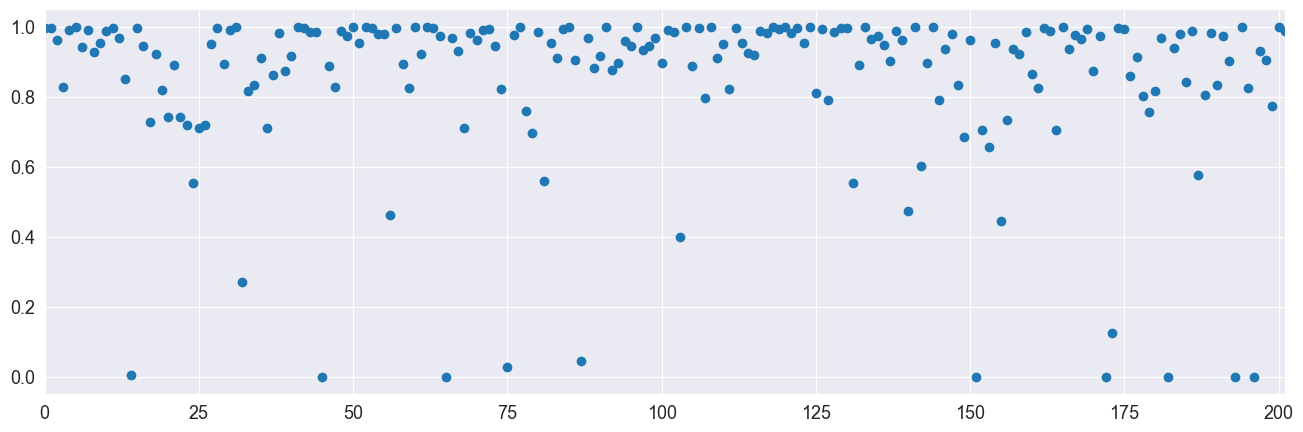

In [69]:
fig = plt.figure(figsize=(16, 5))
lines = plt.plot(res_robust.weights, marker="o", linestyle="none")
ax = plt.gca()
xlim = ax.set_xlim(df.index[0], df.index[-1])

In [46]:
df[res_robust.weights<0.2]



,num_people_11_30
14,92.0
45,247.0
65,212.0
75,224.0
87,216.0
151,303.0
172,290.0
173,82.0
182,262.0
193,206.0


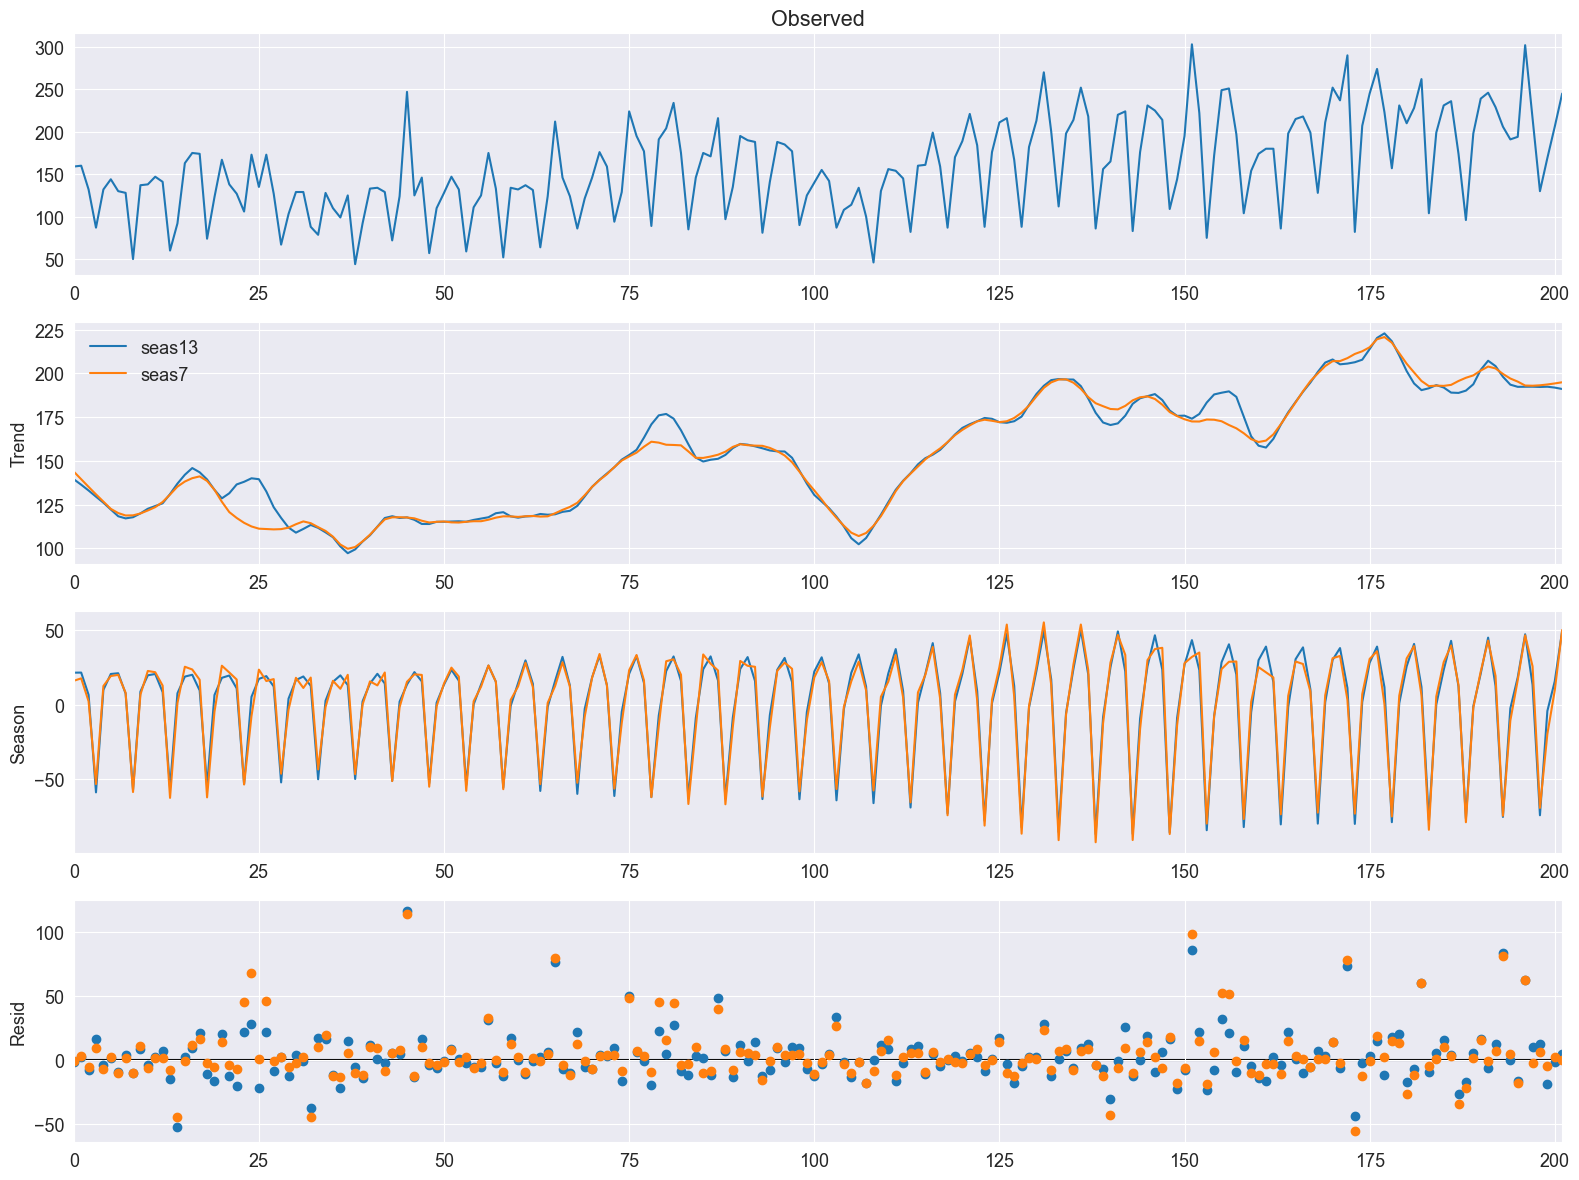

In [70]:
stl = STL(df, period=5, seasonal=13, robust=True)
res_seas_large = stl.fit()
fig = res_seas_large.plot()
res_seas_small = STL(df, period=5, seasonal=7, robust=True).fit()
add_stl_plot(fig, res_seas_small, ["seas13", "seas7"])

In [11]:
np.mean(np.abs(res_seas_large.resid))

14.625143828406221

In [12]:
np.mean(np.abs(res_seas_small.resid))

12.749550587404041

In [50]:
res_seas_large.seasonal.iloc[[range(0,200,5)]]


ValueError: Wrong number of dimensions. values.ndim > ndim [2 > 1]

In [75]:
res_seas_large.seasonal.iloc[list(range(106,200,5))]

106    33.742228
111    37.301078
116    41.305413
121    44.825729
126    47.461798
131    49.365515
136    50.229075
141    49.184077
146    46.570820
151    43.311913
156    40.501436
161    38.969060
166    38.438329
171    37.968793
176    38.960953
181    40.767920
186    42.830738
191    45.008975
196    47.242025
Name: season, dtype: float64

In [73]:
df_dates.iloc[list(range(106,200,5))]

,date,weekday
106,2022-07-27,2
111,2022-08-03,2
116,2022-08-10,2
121,2022-08-17,2
126,2022-08-24,2
131,2022-08-31,2
136,2022-09-07,2
141,2022-09-14,2
146,2022-09-21,2
151,2022-09-28,2


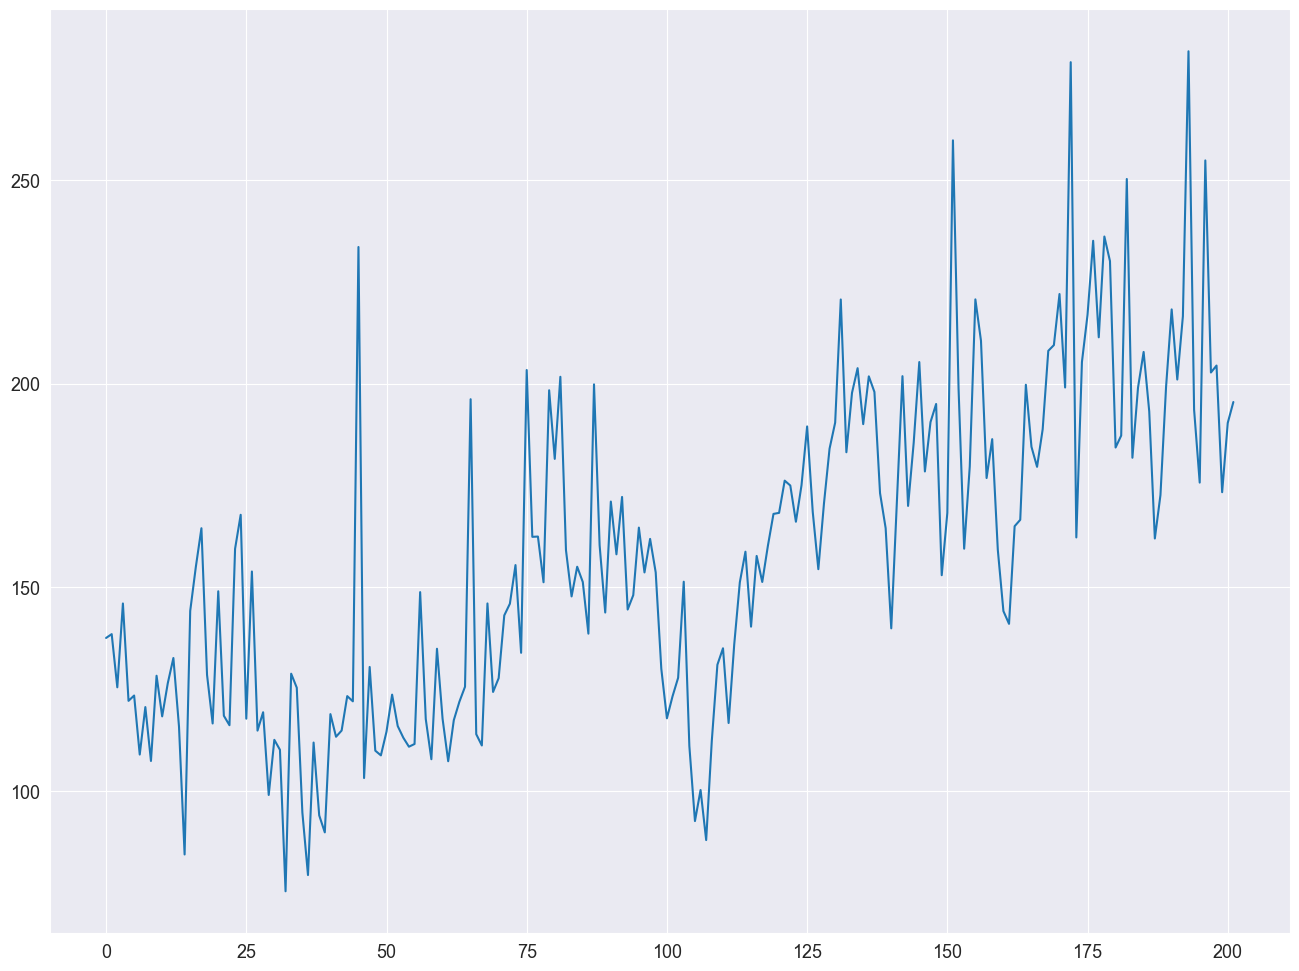

In [54]:
#plt.plot(df)
# df_without_seas=df-res_seas_large.seasonal
plt.plot(df.values.ravel() - res_seas_large.seasonal)


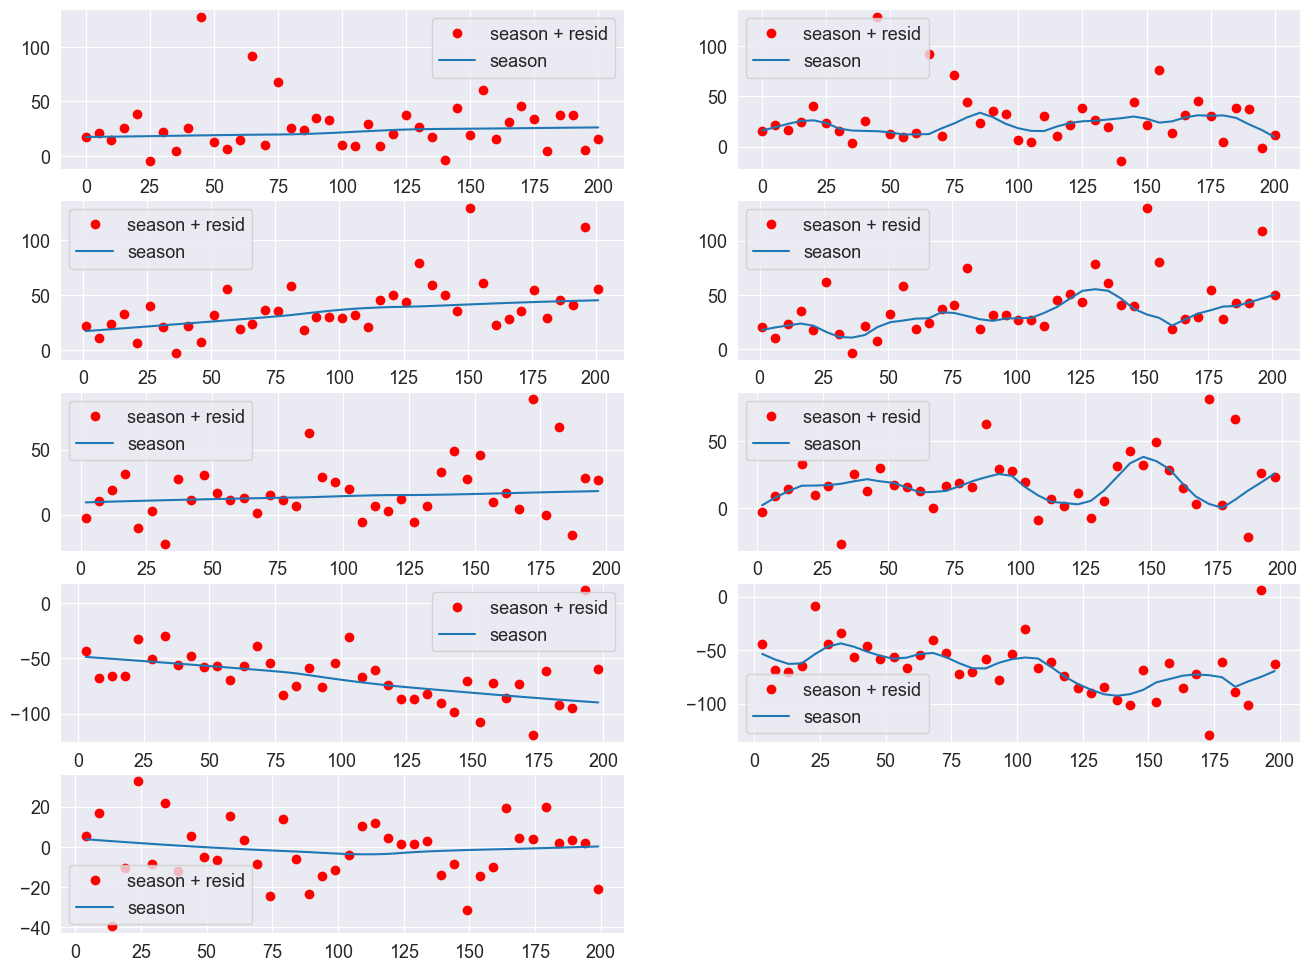

In [14]:
stl = STL(df, period=5, seasonal=33, robust=True)
res_robust = stl.fit()

df_seasonal=res_robust.seasonal
df_resid=res_robust.resid
for weekday in [0,1,2,3,4]:
    index_list=[i for i in  df_seasonal.index.values if i % 5 == weekday]
    wd_seas=df_seasonal.iloc[index_list]
    df_seas_resid= df_resid+df_seasonal
    wd_seas_resid=df_seas_resid.iloc[index_list]
    subplotnum = weekday*2 + 521
    plt.subplot(subplotnum)
    plt.plot(wd_seas_resid,'ro')
    plt.plot(wd_seas)
    plt.legend(['season + resid','season'])

stl = STL(df, period=5, seasonal=7, robust=True)
res_robust = stl.fit()

df_seasonal = res_robust.seasonal
df_resid = res_robust.resid
for weekday in [0, 1, 2, 3]:
    index_list = [i for i in df_seasonal.index.values if i % 5 == weekday]
    wd_seas = df_seasonal.iloc[index_list]
    df_seas_resid = df_resid + df_seasonal
    wd_seas_resid = df_seas_resid.iloc[index_list]
    subplotnum = weekday*2+1 + 521
    plt.subplot(subplotnum)
    plt.plot(wd_seas_resid, 'ro')
    plt.plot(wd_seas)
    plt.legend(['season + resid', 'season'])

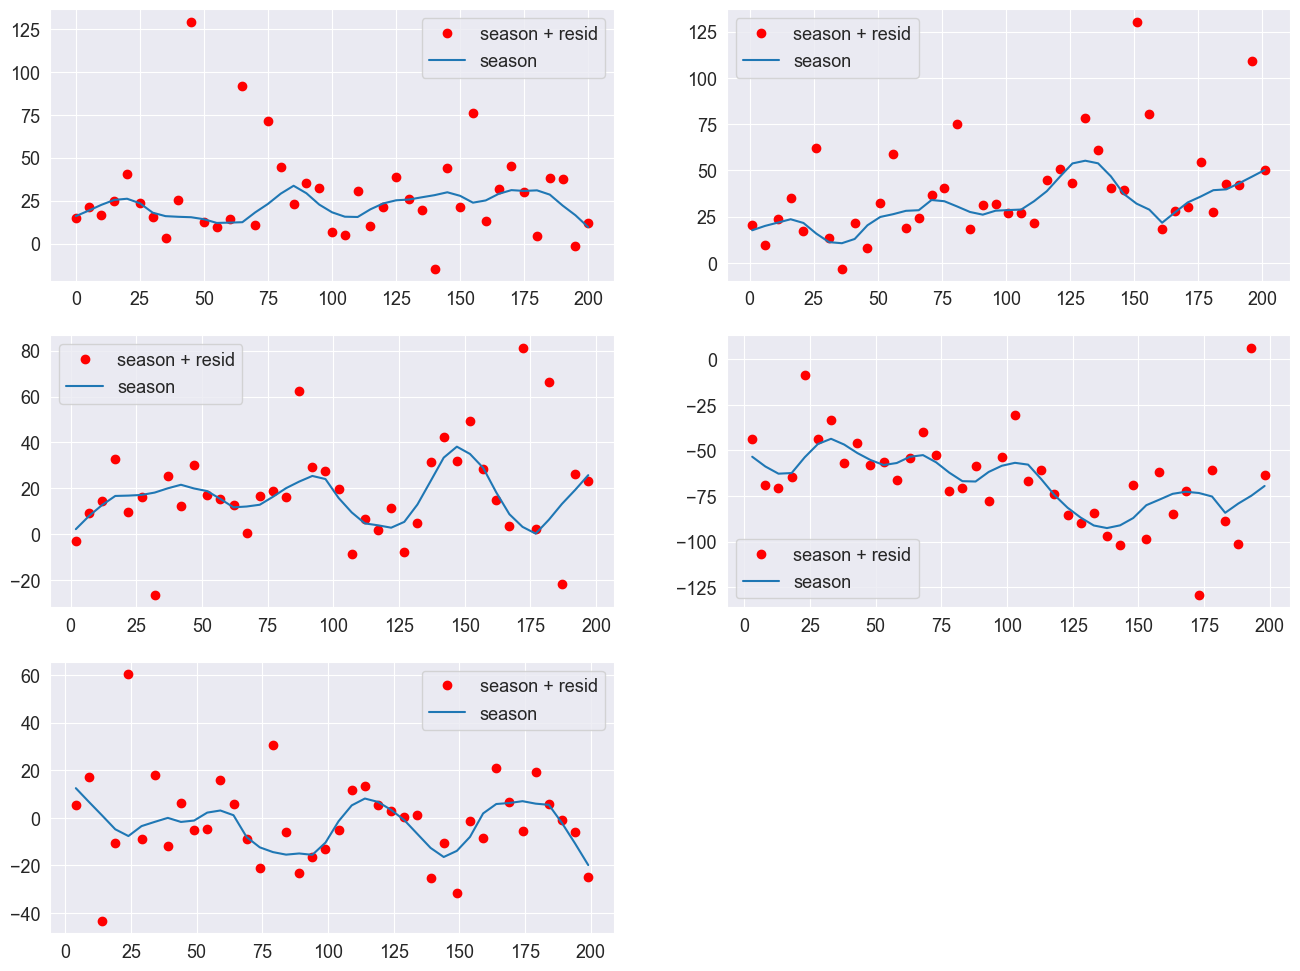

In [15]:
stl = STL(df, period=5, seasonal=7, robust=True)
res_robust = stl.fit()

df_seasonal=res_robust.seasonal
df_resid=res_robust.resid
for weekday in [0,1,2,3,4]:
    index_list=[i for i in  df_seasonal.index.values if i % 5 == weekday]
    wd_seas=df_seasonal.iloc[index_list]
    df_seas_resid= df_resid+df_seasonal
    wd_seas_resid=df_seas_resid.iloc[index_list]
    subplotnum = weekday + 321
    plt.subplot(subplotnum)
    plt.plot(wd_seas_resid,'ro')
    plt.plot(wd_seas)
    plt.legend(['season + resid','season'])


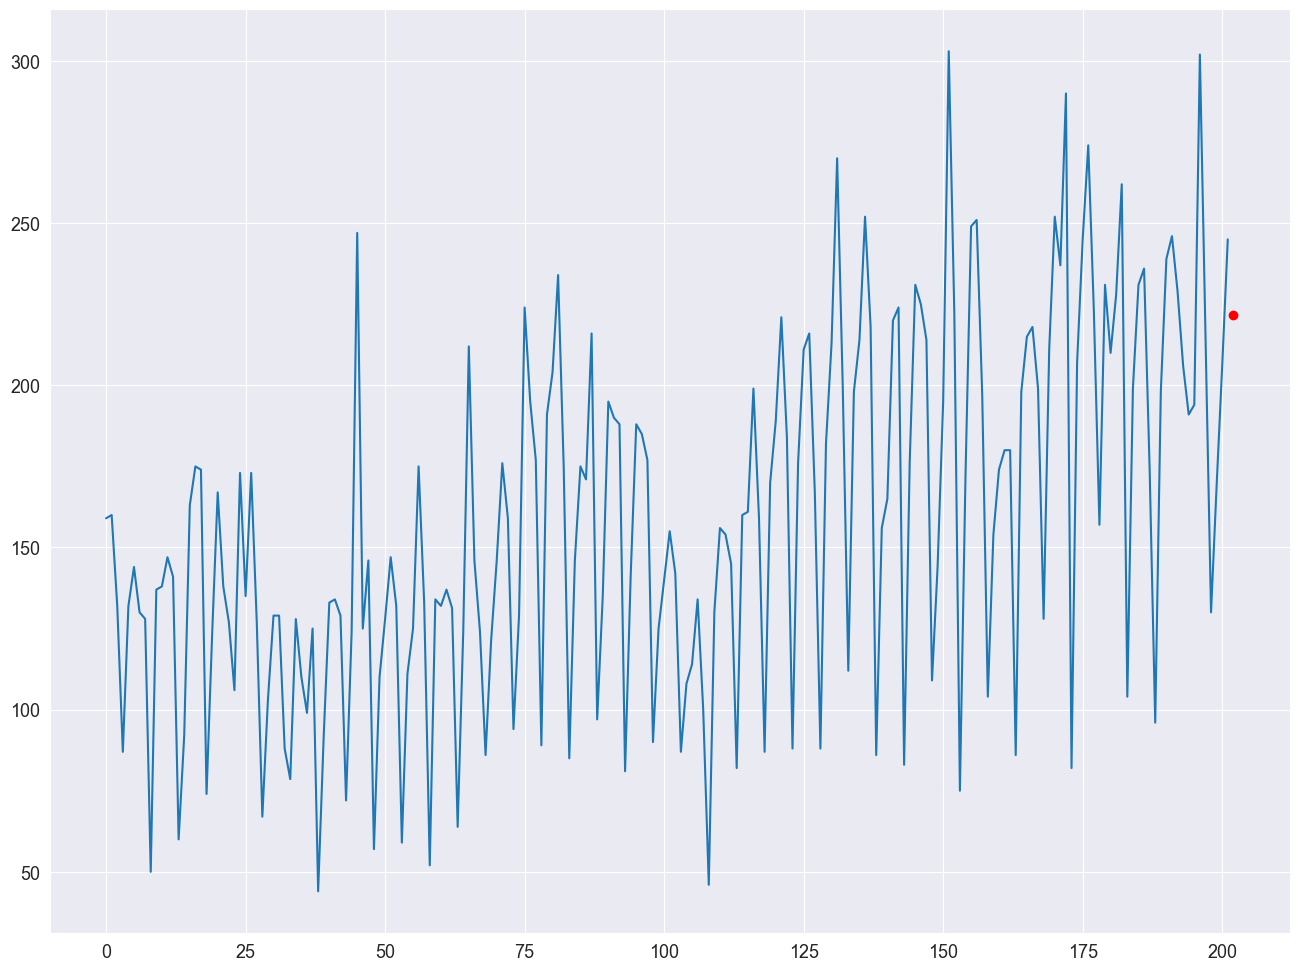

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.forecasting.stl import STLForecast

stlf = STLForecast(df,ARIMA,period=5,seasonal=7,robust=True, model_kwargs=dict(order=(1, 1, 0), trend="t"))
stlf_res = stlf.fit()

forecast = stlf_res.forecast(1)
plt.plot(df)
plt.plot(forecast, 'ro')
plt.show()

In [17]:
df_pred=pd.DataFrame()
for i in range(150, len(df)-1):
    stlf = STLForecast(df[:i],ARIMA,period=5,seasonal=33,robust=True, model_kwargs=dict(order=(1, 1, 0), trend="t"))
    stlf_res = stlf.fit()
    forecast = stlf_res.forecast(1)
    df_pred.loc[forecast.index[0],'predictions']=forecast.values[0]


In [18]:
df_pred=df_pred.join(df)


In [19]:
df_pred.rename(columns={('num_people_11_30',):'num_people_11_30'},inplace=True)


In [20]:
df_pred['error']=df_pred['predictions']-df_pred['num_people_11_30']
df_pred['abs_error']= np.abs(df_pred['error'])

In [21]:
df_pred['square_error']=df_pred['abs_error']**2

In [22]:
print(f'mean abs error: {np.mean(df_pred["abs_error"])}')
print(f'mean abs error: {np.mean(df_pred["square_error"])**0.5}')


mean abs error: 30.552111892824207
mean abs error: 40.05282765864363


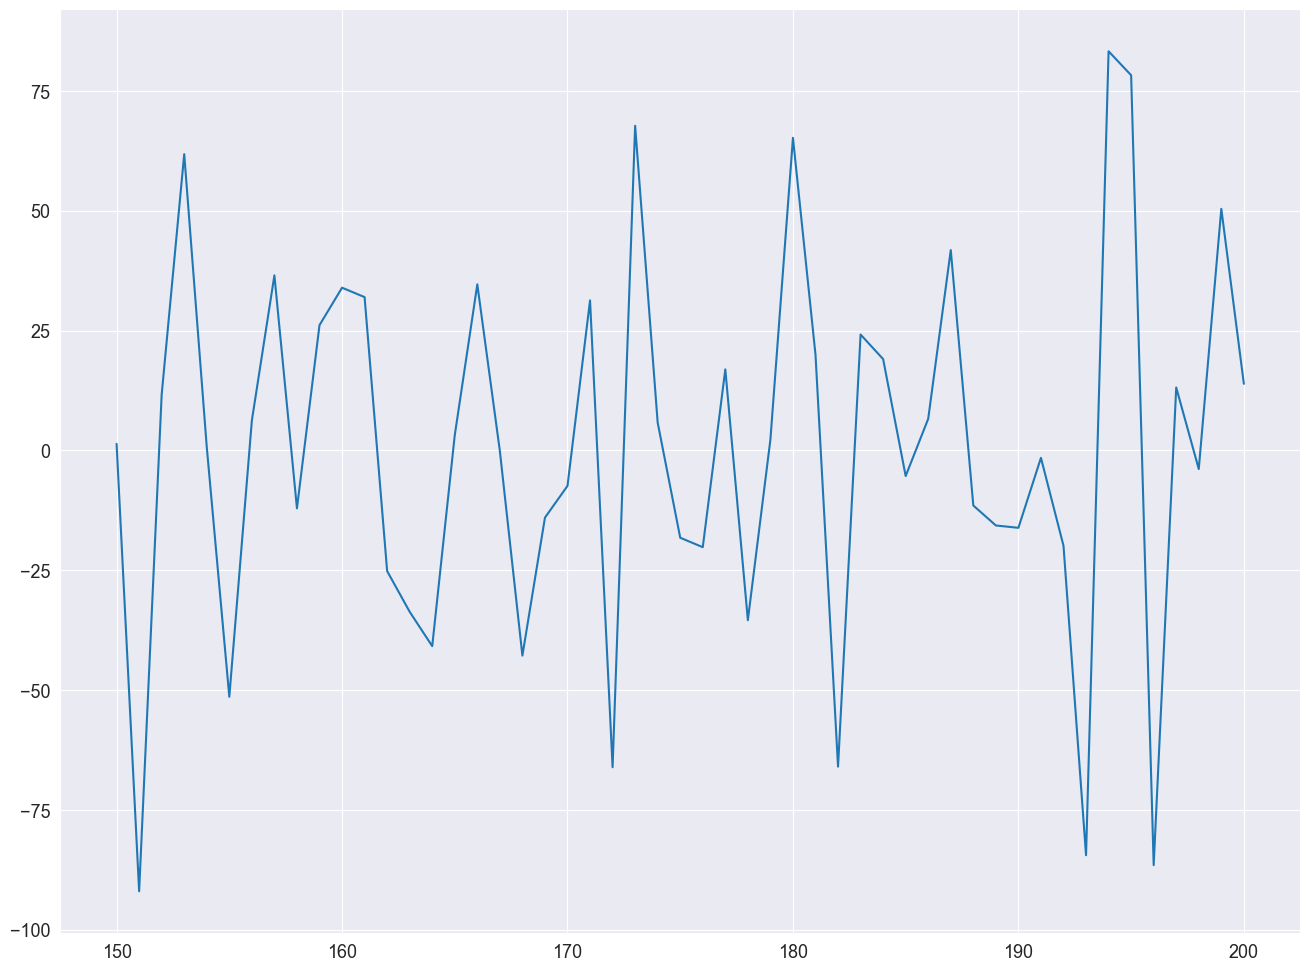

In [23]:
plt.plot(df_pred['error'])

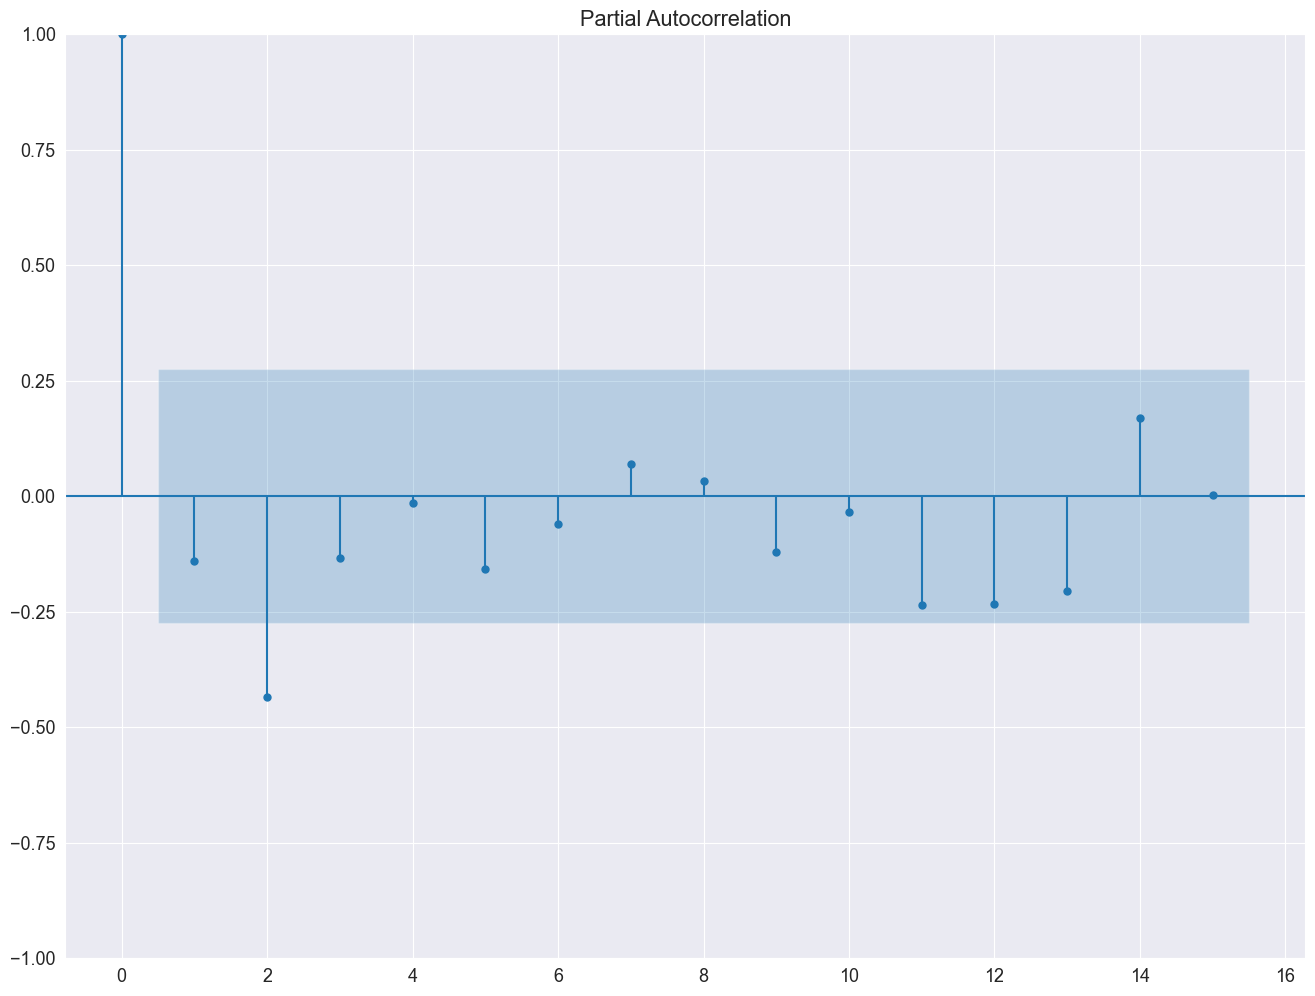

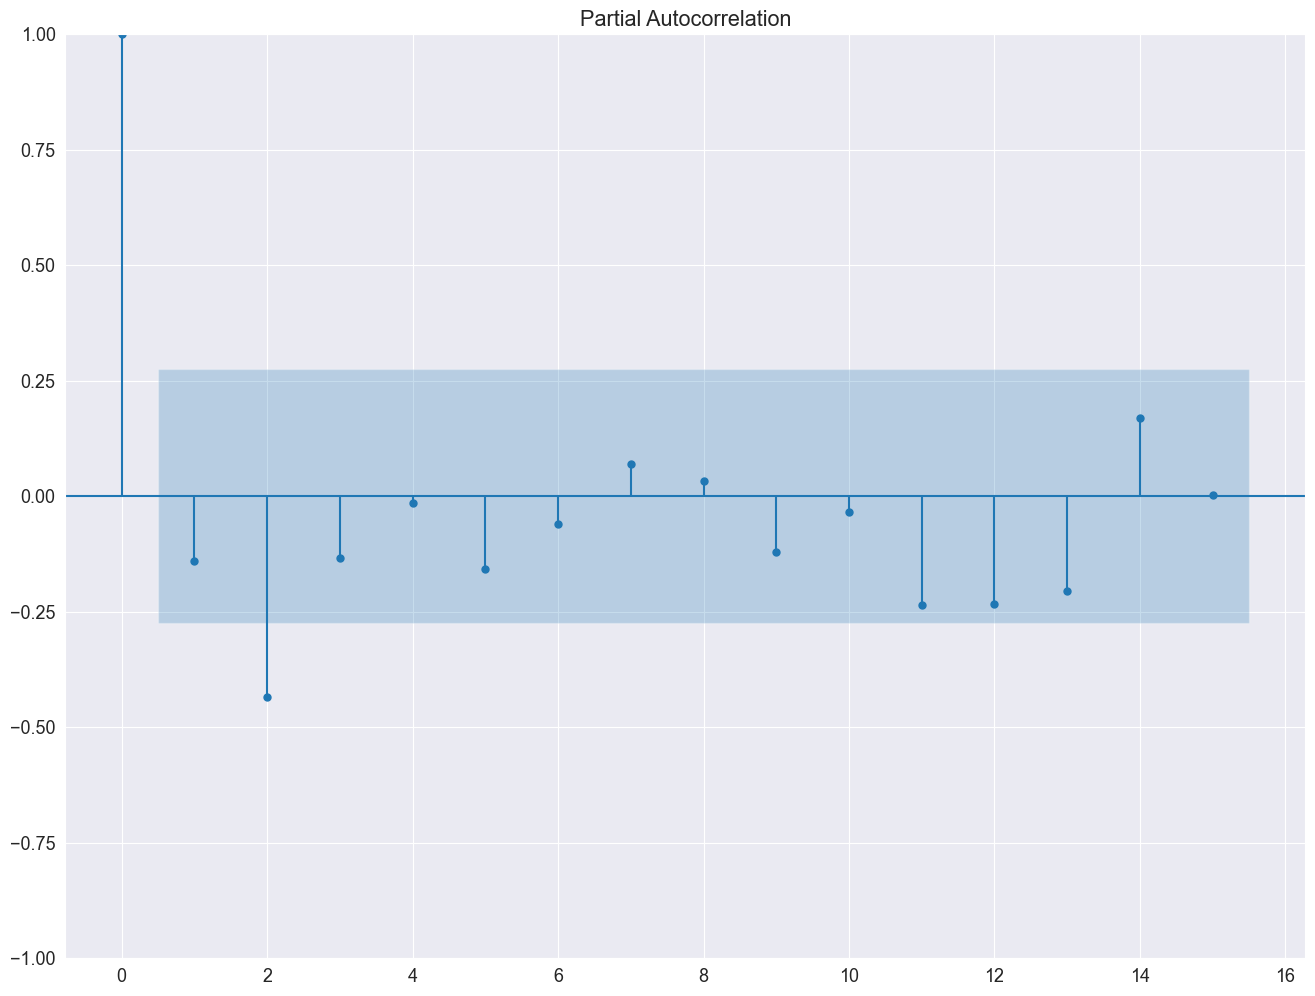

In [24]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_pred['error'], lags=15, method='ywm')

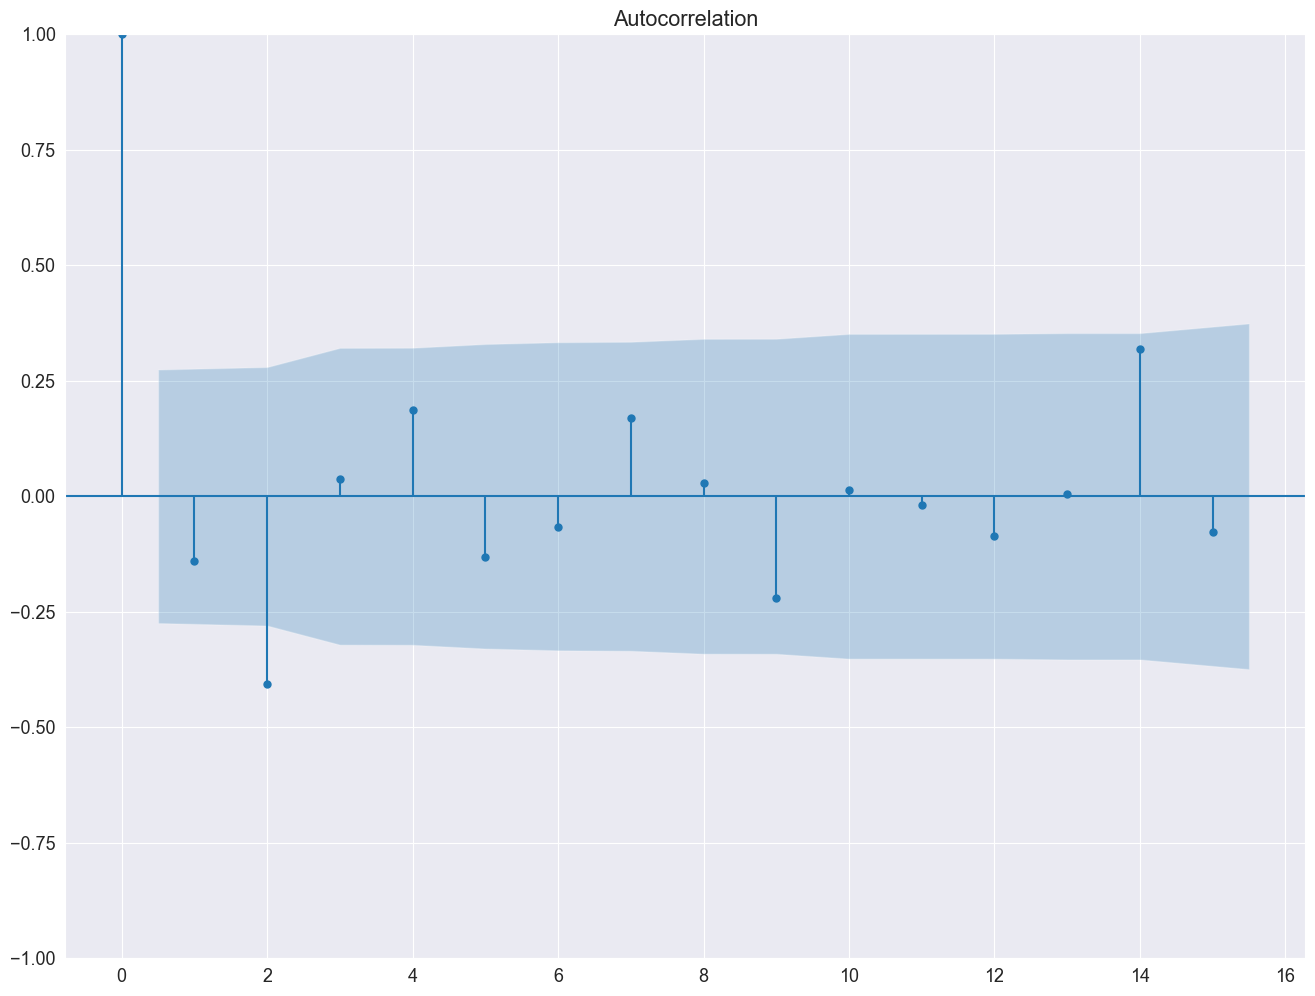

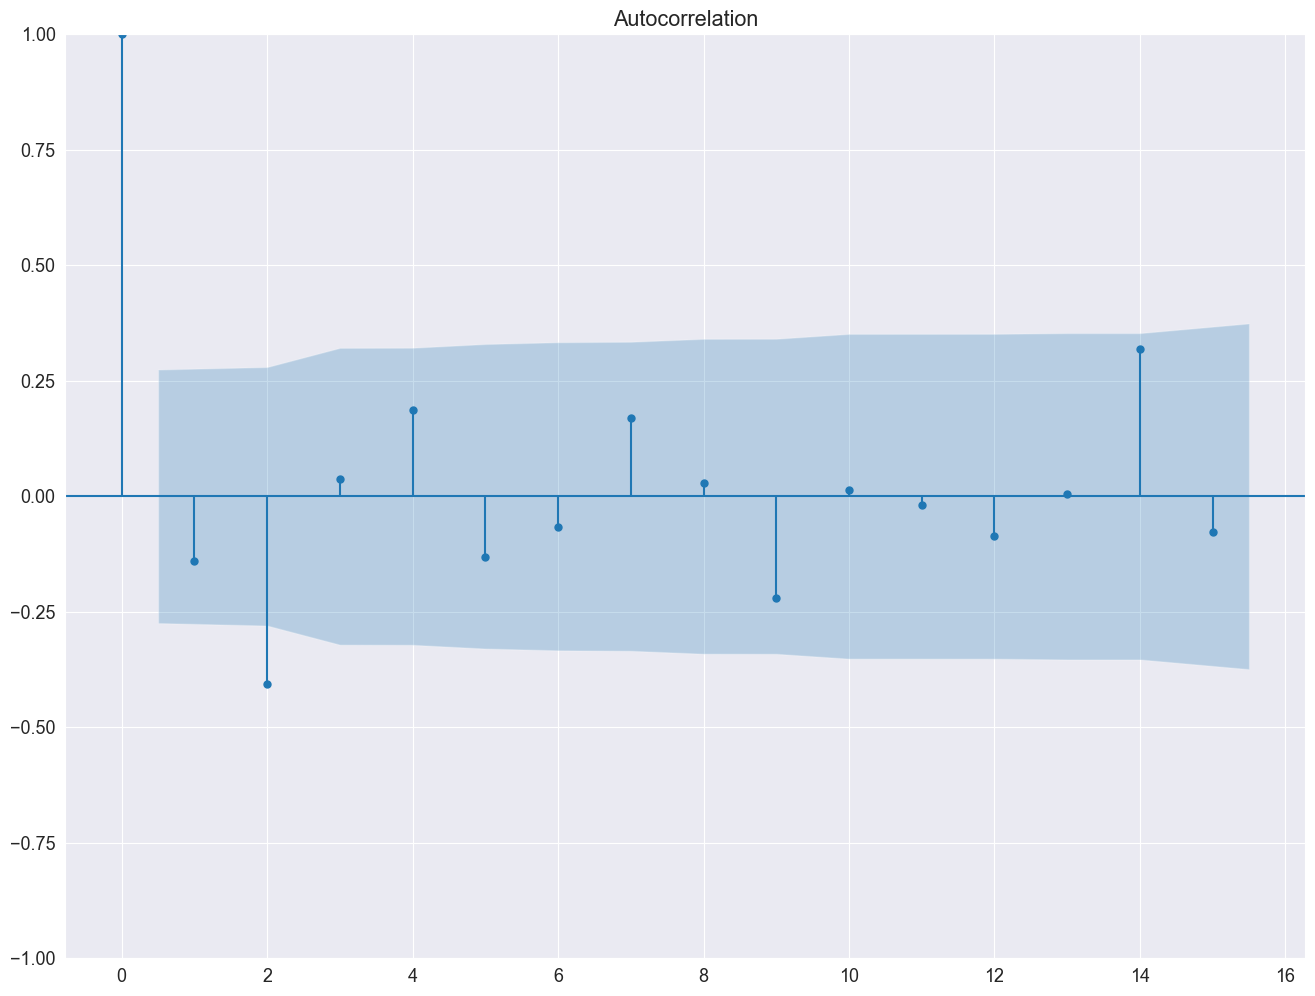

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_pred['error'], lags=15)

In [26]:
df_pred

,predictions,num_people_11_30,error,abs_error,square_error
150,196.358829,195.0,1.358829,1.358829,1.846416
151,211.021623,303.0,-91.978377,91.978377,8460.021801
152,233.660012,222.0,11.660012,11.660012,135.955876
153,136.797971,75.0,61.797971,61.797971,3818.989276
154,172.688181,172.0,0.688181,0.688181,0.473593
155,197.597711,249.0,-51.402289,51.402289,2642.195285
156,257.234033,251.0,6.234033,6.234033,38.863172
157,233.508798,197.0,36.508798,36.508798,1332.892361
158,91.898802,104.0,-12.101198,12.101198,146.439000
159,180.117784,154.0,26.117784,26.117784,682.138634


In [27]:
df['pred_one_week_ago']=df.shift(5)